Using the Ecommerce Data. Training Logistic Regression with Softmax. (No hidden layer)

https://github.com/lazyprogrammer/machine_learning_examples/blob/master/ann_logistic_extra/logistic_softmax_train.py

In [1]:
%run 'ECommerce.ipynb' #runs the notebook with the data prep work

[[ 1.          0.          0.65750995  0.          3.          0.        ]
 [ 1.          1.          0.56857123  0.          2.          1.        ]
 [ 1.          0.          0.042246    1.          1.          0.        ]
 ..., 
 [ 0.          0.          0.1728534   1.          3.          0.        ]
 [ 1.          0.          0.2099644   0.          3.          0.        ]
 [ 0.          0.          2.61688195  1.          3.          0.        ]]
(500L, 5L)
(500L,)
[[ 1.         -1.89931526 -1.37410378 ...,  0.          0.          1.        ]
 [ 1.         -0.89931526 -1.46304249 ...,  0.          1.          0.        ]
 [ 1.         -1.89931526 -1.98936773 ...,  1.          0.          0.        ]
 ..., 
 [ 0.         -1.89931526 -1.85876033 ...,  0.          0.          1.        ]
 [ 1.         -1.89931526 -1.82164933 ...,  0.          0.          1.        ]
 [ 0.         -1.89931526  0.58526823 ...,  0.          0.          1.        ]]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.utils import shuffle

In [3]:
#Need a function to get the indicator matrix from the targets. This takes the column of 0,1,2,3 and transforms into a one-hot 
#encoded matrix 

def y2indicator(y, K):
    N = len(y) #for training this will be 400
    ind = np.zeros((N,K)) #creates a 400x4 matrix
    for i in xrange(N):
        ind[i, y[i]] = 1
    return ind

In [4]:
X, Y = get_data()
X, Y = shuffle(X, Y)
Y = Y.astype(np.int32) #No decimal places

D = X.shape[1] #8
K = len(set(Y)) #4

In [5]:
#Split the data between train and test sets

Xtrain = X[:-100]
Ytrain = Y[:-100]

Ytrain_ind = y2indicator(Ytrain, K)

Xtest = X[-100:]
Ytest = Y[-100:]

Ytest_ind = y2indicator(Ytest, K)

In [6]:
#Initialize some weights.

W = np.random.rand(D, K)
b = np.zeros(K)

In [7]:
def softmax(a):
    expA = np.exp(a)
    return expA / expA.sum(axis=1, keepdims=True)

def forward(X, W, b):
    return softmax(X.dot(W) + b)

def predict(P_Y_given_X):
    return np.argmax(P_Y_given_X, axis=1)

# calculate the accuracy
def classification_rate(Y, P):
    return np.mean(Y == P)

def cross_entropy(T, pY): #from definition
    return -np.mean(T*np.log(pY))

0 0.357683030141 0.350949842372
1000 0.0874963759633 0.100148238823
2000 0.0833922755446 0.0954420447932
3000 0.0818793775156 0.0937517042595
4000 0.0811329529833 0.0929201696446
5000 0.0807055660132 0.092435432172
6000 0.0804371967196 0.0921216420937
7000 0.0802577004347 0.0919038738726
8000 0.0801319957712 0.0917451577838
9000 0.0800408194024 0.0916252184321
Final train classification_rate: 0.9075
Final test classification_rate: 0.85


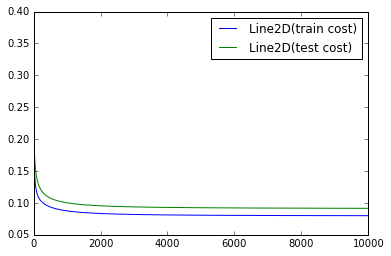

In [8]:
train_costs = []
test_costs = []

learning_rate = .001
for i in xrange(10000):
    pYtrain = forward (Xtrain, W, b) #Will create a 400x4 matrix
    pYtest = forward(Xtest, W, b)
    
    ctrain = cross_entropy(Ytrain_ind, pYtrain)
    ctest = cross_entropy(Ytest_ind, pYtest)
    train_costs.append(ctrain)
    test_costs.append(ctest)

    # gradient descent
    W -= learning_rate*Xtrain.T.dot(pYtrain - Ytrain_ind)
    b -= learning_rate*(pYtrain - Ytrain_ind).sum(axis=0)
    if i % 1000 == 0:
        print i, ctrain, ctest
        
print "Final train classification_rate:", classification_rate(Ytrain, predict(pYtrain))
print "Final test classification_rate:", classification_rate(Ytest, predict(pYtest))

legend1, = plt.plot(train_costs, label='train cost')
legend2, = plt.plot(test_costs, label='test cost')

plt.legend([legend1, legend2])
plt.show()

In [22]:
print pYtrain

[[  9.96491850e-01   3.46865236e-03   3.94958175e-05   1.92420992e-09]
 [  3.48850102e-03   7.18534262e-01   2.70035030e-01   7.94220701e-03]
 [  9.99145033e-01   8.49145148e-04   5.82135374e-06   2.10733887e-11]
 ..., 
 [  9.90195545e-01   9.79659988e-03   7.85434352e-06   1.14300731e-09]
 [  1.24309469e-08   3.14090143e-01   3.67609020e-01   3.18300824e-01]
 [  9.95181040e-01   4.22583325e-03   5.93114661e-04   1.17911233e-08]]


In [16]:
predict(pYtrain)

array([0, 1, 0, 1, 2, 0, 0, 1, 1, 2, 0, 1, 1, 1, 0, 1, 2, 2, 1, 1, 2, 2, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 1, 2,
       0, 1, 2, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 1, 3, 3, 2, 2, 0, 1, 0, 2, 0, 1, 2, 1, 0, 0, 0, 3,
       1, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 2, 1, 1, 1, 3, 1, 0, 1, 1, 1, 0, 2, 2, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0,
       2, 1, 1, 0, 0, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0, 1, 2, 1, 1, 0, 1, 0, 1,
       0, 1, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 3, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 3, 0, 2, 2, 0, 0, 0, 0, 1, 3, 0, 0, 0, 3, 0, 0, 1, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 3, 0, 1, 0, 0, 3, 0, 0, 0, 0, 3,
       1, 1,

In [17]:
predict(pYtrain).shape

(400L,)

In [9]:
print Ytrain_ind

[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 1.  0.  0.  0.]
 ..., 
 [ 1.  0.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 1.  0.  0.  0.]]


In [10]:
Ytrain

array([0, 1, 0, 1, 3, 0, 0, 1, 0, 2, 0, 1, 1, 1, 0, 1, 2, 2, 2, 1, 2, 2, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 1, 2,
       0, 1, 2, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 1, 3, 0, 2, 2, 0, 1, 0, 2, 0, 1, 2, 2, 0, 0, 0, 3,
       1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 2, 0, 1, 0, 1,
       0, 0, 1, 2, 1, 1, 2, 3, 1, 0, 1, 1, 1, 0, 3, 2, 0, 1, 0, 2, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0,
       2, 1, 1, 0, 0, 0, 2, 2, 1, 1, 0, 2, 0, 1, 0, 1, 2, 1, 1, 0, 1, 0, 2,
       0, 1, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 3, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 2, 2, 0, 0, 0, 0, 1, 3, 0, 0, 0, 3, 0, 0, 1, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 3, 0, 1, 0, 0, 3, 0, 0, 0, 0, 3,
       1, 1,

In [11]:
X.shape

(500L, 8L)

In [12]:
set(Y)

{0, 1, 2, 3}

In [13]:
K

4

In [14]:
Y

array([0, 1, 0, 1, 3, 0, 0, 1, 0, 2, 0, 1, 1, 1, 0, 1, 2, 2, 2, 1, 2, 2, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 1, 2,
       0, 1, 2, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 1, 3, 0, 2, 2, 0, 1, 0, 2, 0, 1, 2, 2, 0, 0, 0, 3,
       1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 2, 0, 1, 0, 1,
       0, 0, 1, 2, 1, 1, 2, 3, 1, 0, 1, 1, 1, 0, 3, 2, 0, 1, 0, 2, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0,
       2, 1, 1, 0, 0, 0, 2, 2, 1, 1, 0, 2, 0, 1, 0, 1, 2, 1, 1, 0, 1, 0, 2,
       0, 1, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 3, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 2, 2, 0, 0, 0, 0, 1, 3, 0, 0, 0, 3, 0, 0, 1, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 3, 0, 1, 0, 0, 3, 0, 0, 0, 0, 3,
       1, 1,